# Guassian Mixture MODEL


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GaussianMixture
import seaborn as sns



Means of the GMM components:
[[ 2.88443563  3.03402228]
 [-2.87175128 -2.95651243]]

Covariances of the GMM components:
[[[ 0.72594118  0.02736999]
  [ 0.02736999  0.98774231]]

 [[ 1.06992689 -0.08042348]
  [-0.08042348  0.8650939 ]]]


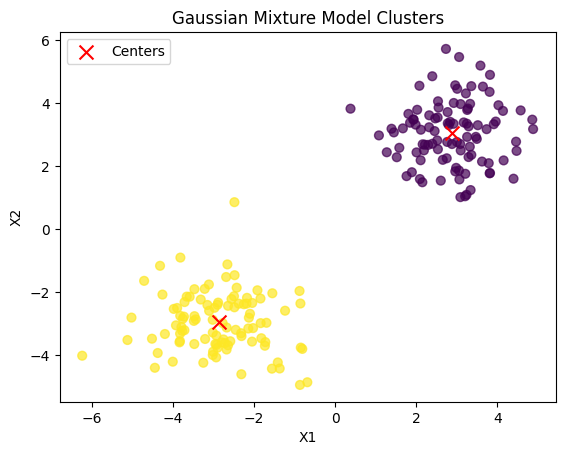

In [3]:

# Generate synthetic data
np.random.seed(42)
X1 = np.random.normal(loc=[3, 3], scale=1, size=(100, 2))
X2 = np.random.normal(loc=[-3, -3], scale=1, size=(100, 2))
X = np.vstack([X1, X2])

# Instantiate a GaussianMixture model with 2 components (since we know there are 2 clusters in the synthetic data)
gmm = GaussianMixture(n_components=2)

# Fit the model to the data
gmm.fit(X)

# Predict the cluster labels
labels = gmm.predict(X)

# Print the means and covariances of the fitted GMM
print("Means of the GMM components:")
print(gmm.means_)
print("\nCovariances of the GMM components:")
print(gmm.covariances_)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40, alpha=0.7)
plt.title('Gaussian Mixture Model Clusters')
plt.xlabel('X1')
plt.ylabel('X2')

# Plot the centers of the clusters
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100, label='Centers')
plt.legend()
plt.show()


In [7]:
import pandas as pd
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Cluster'] = labels

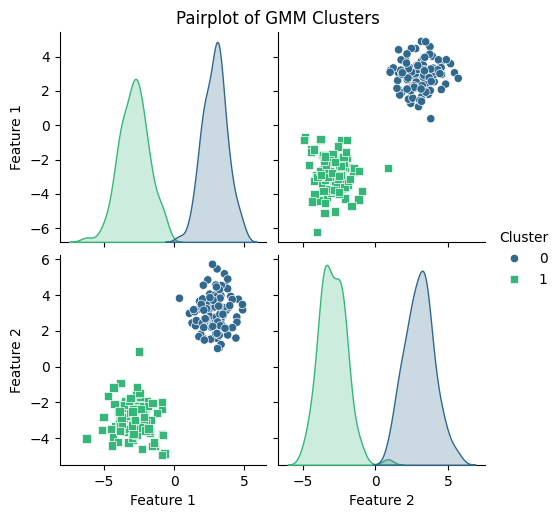

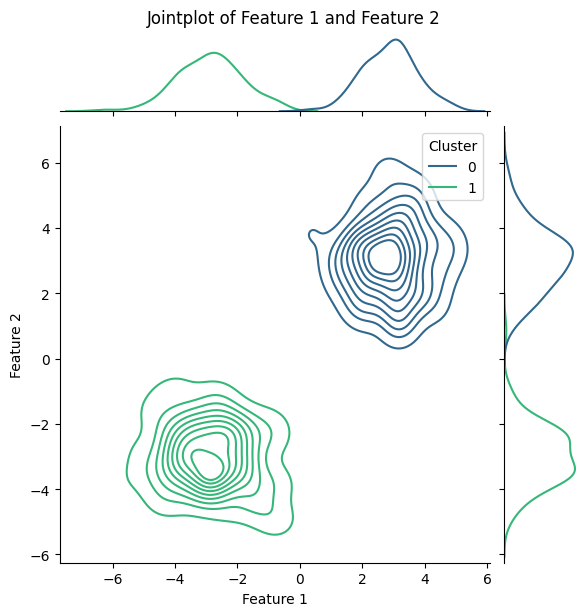

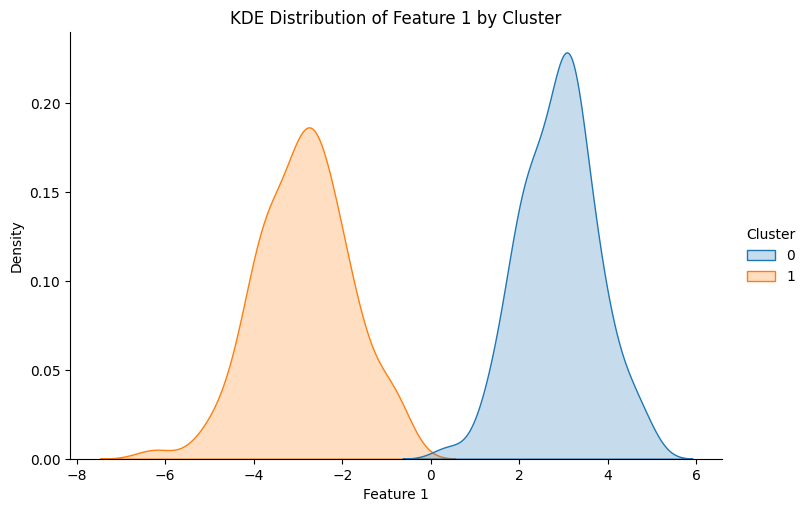

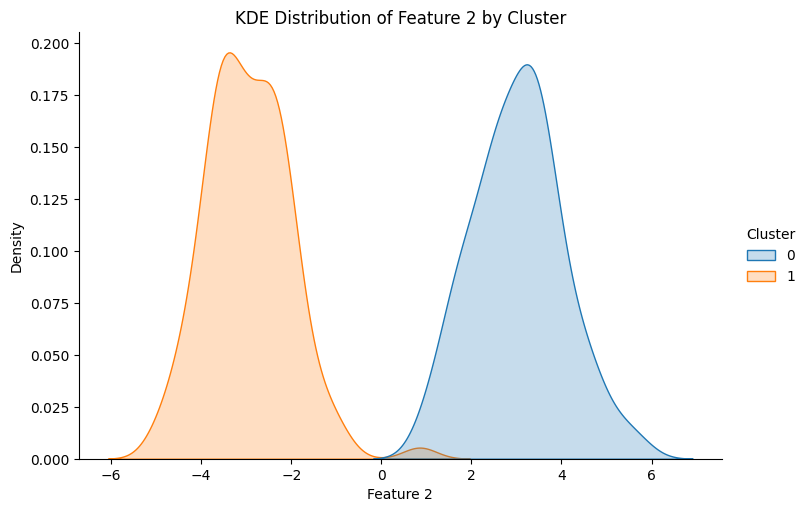

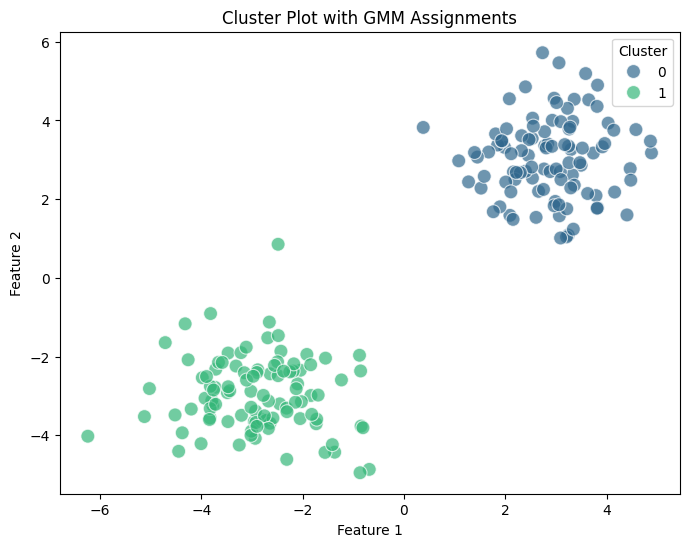

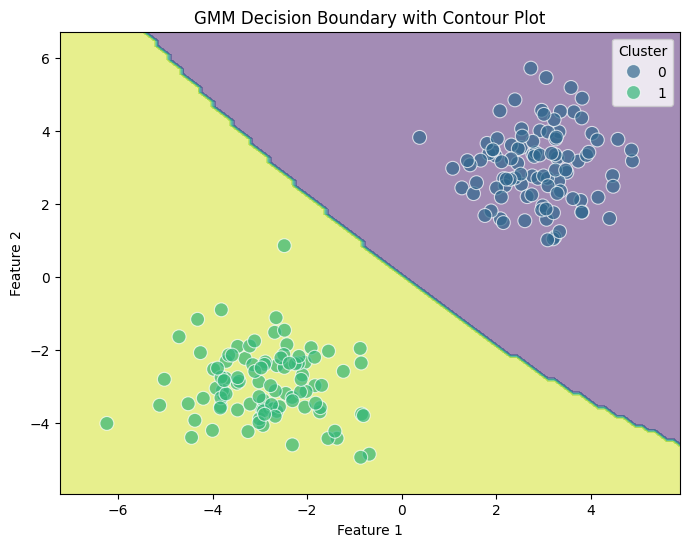

In [8]:
sns.pairplot(df, hue="Cluster", palette='viridis', markers=["o", "s"])
plt.suptitle('Pairplot of GMM Clusters', y=1.02)
plt.show()

# Plot 2: Jointplot for Feature 1 and Feature 2
sns.jointplot(data=df, x="Feature 1", y="Feature 2", hue="Cluster", palette='viridis', kind='kde')
plt.suptitle('Jointplot of Feature 1 and Feature 2', y=1.02)
plt.show()

# Plot 3: Distribution of each feature
sns.displot(df, x="Feature 1", hue="Cluster", kind="kde", fill=True, aspect=1.5)
plt.title('KDE Distribution of Feature 1 by Cluster')
plt.show()

sns.displot(df, x="Feature 2", hue="Cluster", kind="kde", fill=True, aspect=1.5)
plt.title('KDE Distribution of Feature 2 by Cluster')
plt.show()

# Plot 4: Cluster Plot with Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Cluster', palette='viridis', data=df, s=100, alpha=0.7)
plt.title('Cluster Plot with GMM Assignments')
plt.show()

# Plot 5: Contour plot with the GMM decision boundary (using the GMM parameters)
x_min, x_max = df['Feature 1'].min() - 1, df['Feature 1'].max() + 1
y_min, y_max = df['Feature 2'].min() - 1, df['Feature 2'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='viridis')
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Cluster', palette='viridis', data=df, s=100, alpha=0.7)
plt.title('GMM Decision Boundary with Contour Plot')
plt.show()